In [2]:
import numpy as np
import matplotlib.pyplot as plt
import boundarysearch as bs
import helpfunc as hf


ModuleNotFoundError: No module named 'numpy'

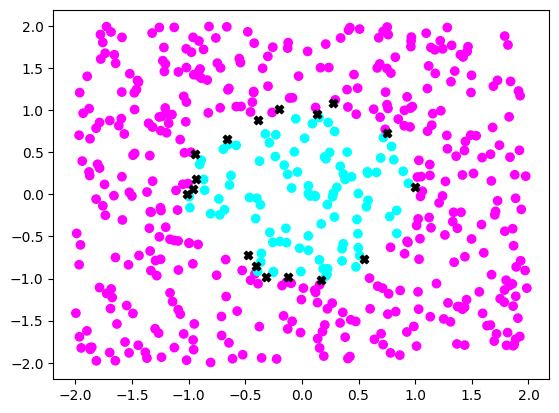

In [5]:
#define dimensions
#first consider  two-dimensional space
D=2
w=[1,1,1]
#create global box
xmin=np.array([-2]*D)
xmax=np.array([2]*D)

#create dataset
#based on N-dimensional sphere
data=hf.make_dataND(hf.sphere2,w,xmin,xmax,N=500)

#create boundary finder
bf=bs.BoundaryFinder(data[:,:D],data[:,D])
#plot data
plt.scatter(data[:,0],data[:,1],c=data[:,2],alpha=1,cmap='cool')

#find boundary points
bf.fit()

#plot boundary points
plt.scatter(bf.coord[:,0],bf.coord[:,1],c='k',marker="X")




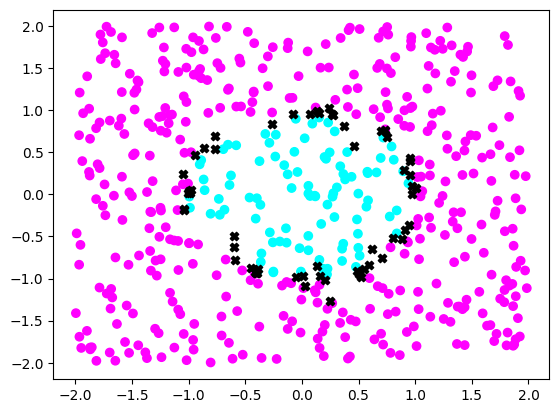

In [6]:
#create boundary finder with repeat
bf=bs.BoundaryFinder(data[:,:D],data[:,D],repeat=5)
#plot data
plt.scatter(data[:,0],data[:,1],c=data[:,2],alpha=1,cmap='cool')

#find boundary points
bf.fit()

#plot boundary points
plt.scatter(bf.coord[:,0],bf.coord[:,1],c='k',marker="X")


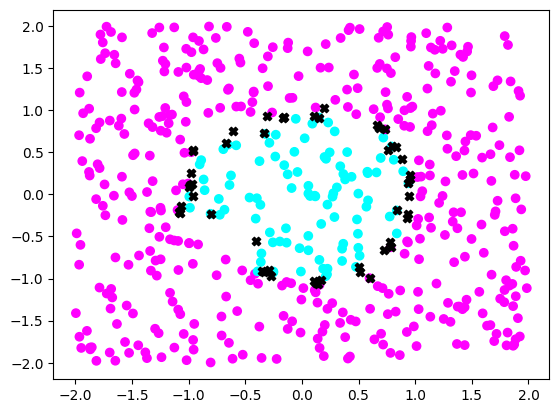

In [7]:
#create boundary finder with repeat and weighted method
bf=bs.BoundaryFinder(data[:,:D],data[:,D],repeat=5,method='weighted',points_per_dim=5)
#plot data
plt.scatter(data[:,0],data[:,1],c=data[:,2],alpha=1,cmap='cool')

#find boundary points
bf.fit()

#plot boundary points
plt.scatter(bf.coord[:,0],bf.coord[:,1],c='k',marker="X")


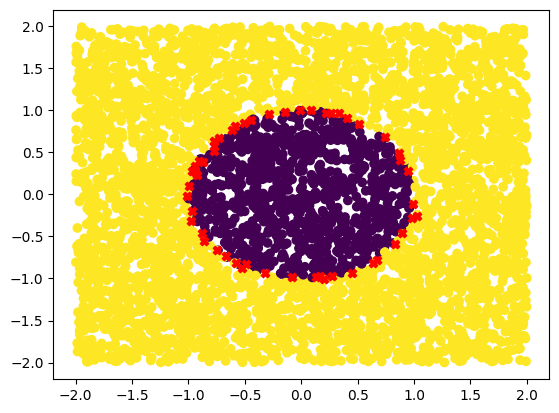

In [31]:
#define dimensions
#first consider  two-dimensional space
D=2
w=[1,1,1]
#create global box
xmin=np.array([-2]*D)
xmax=np.array([2]*D)

#create dataset
#based on N-dimensional sphere
data=hf.make_dataND(hf.sphere2,w,xmin,xmax,N=5000)

#create boundary finder
bf=bs.BoundaryFinder(data[:,:D],data[:,D])
#plot data
plt.scatter(data[:,0],data[:,1],c=data[:,2],alpha=1)

#find boundary points
bf.fit()

#plot boundary points
plt.scatter(bf.coord[:,0],bf.coord[:,1],c='r',marker="X")

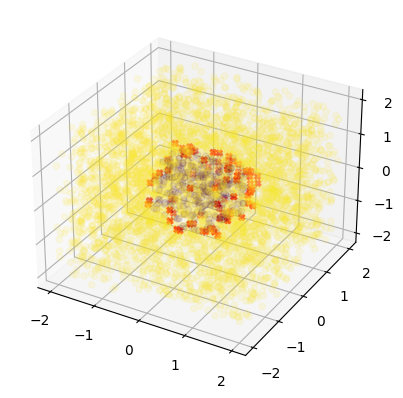

In [8]:

#Now consider  three-dimensional space
D=3
w=[1]*(D+1)
#create global box
xmin=np.array([-2]*D)
xmax=np.array([2]*D)

#create dataset
#based on N-dimensional sphere
data=hf.make_dataND(hf.sphere2,w,xmin,xmax,N=5000)

#create boundary finder
bf=bs.BoundaryFinder(data[:,:D],data[:,D])
#plot data
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(data[:,0],data[:,1],data[:,2],c=data[:,3],zdir='z',alpha=0.1)
#plt.scatter(data[:,0],data[:,1],c=data[:,2],alpha=1,cmap='cool')

#find boundary points
bf.fit()

#plot boundary points
ax.scatter(bf.coord[:,0],bf.coord[:,1],bf.coord[:,2],c='r',marker="X")

Since we cannot easily visualize N-dimensional boundary,lets estimate the performance of the algorithm using another way.  We can calculate the distance from the estimated boundary point to the "ideal" boundary.
To do this, we need to find a  normal to the actual boundary, that passes through the estimated boundary point $\overrightarrow{X}$ and the point on the actual boundary $\overrightarrow{X_0}$. If the boundary is given by an equation:

$f(\overrightarrow{X})=0$,

then the equation of the normal is:

$\overrightarrow{n} \nabla f=0$

To find $\overrightarrow{X_0}$ we need to solve the non-linear system of equations:

$
\left\{
\begin{array}{*{2}{rC}l}
   f(\overrightarrow{X_0})=0 \\
    (\overrightarrow{X_0}-\overrightarrow{X}) \nabla f=0\\
\end{array}
\right. $

The helper function $find\_dist$ solve this system using a non-linear solver
 and $\overrightarrow{X}$ as a trial  value for $\overrightarrow{X_0}$.






Text(0.5, 0, '#Point')

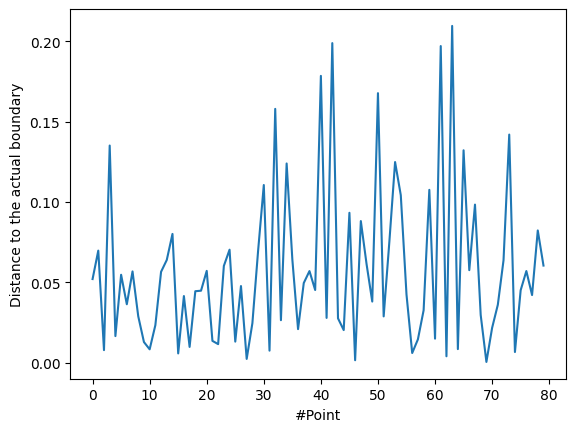

In [9]:
#Find distances from boundary points to "true" boundary
coord=bf.coord
N=coord.shape[0]
dist=[]
for i in range(N):
    dist.append(hf.find_dist(hf.sphere,hf.dersphere,list(coord[i]),w))
plt.plot(dist)
plt.ylabel('Distance to the actual boundary')
plt.xlabel('#Point')

Now, lets consider a dataset where we have outliers, i.e. points that have labels that are different from the neighbors' labels.

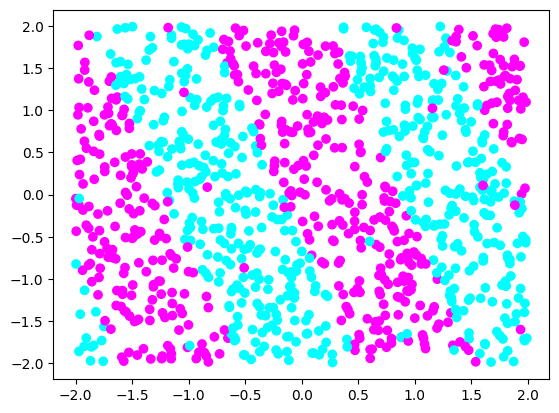

In [24]:
#define new classifification funcion
def fun_harm(x,w):
  return (np.sin(x@w[1:]+w[0]))
D=2
w=[0.5,3,1]
#create global box
xmin=np.array([-2]*D)
xmax=np.array([2]*D)
#create data and noise data
data=hf.make_dataND(fun_harm,w,xmin,xmax,N=1000)
noise_data=hf.uni_noise(xmin,xmax,N=50)
all_data=np.vstack((data,noise_data))
#plot data

plt.scatter(all_data[:,0],all_data[:,1],c=all_data[:,2],cmap='cool')


First, lets use the $weighted$ method to find boundary points.

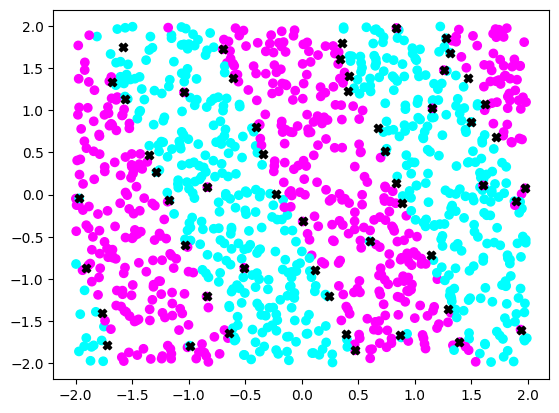

In [25]:
plt.scatter(all_data[:,0],all_data[:,1],c=all_data[:,2],cmap='cool')

bf=bs.BoundaryFinder(all_data[:,:D],all_data[:,D],method='weighted')


#find boundary points
bf.fit()

#plot boundary points
plt.scatter(bf.coord[:,0],bf.coord[:,1],c='k',marker="X")


Because we have outliers, our boundary finder gives us boundary points near the outliers. We can either consider these boundary points as outliers themselves, or amend our finder to avoid getting  such outliers.
If a $purity$ parameter is specified, then the region is considered to be homogenious if:

$purity\geq \frac{n_+-n_-}{n_++n_-}$

where $n_-$ and $n_+$ are datapoints for two different classes.


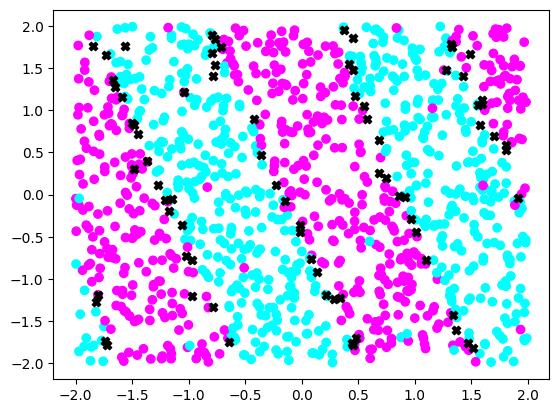

In [27]:
plt.scatter(all_data[:,0],all_data[:,1],c=all_data[:,2],cmap='cool')
#ned finder with purity=0.7
bf=bs.BoundaryFinder(all_data[:,:D],all_data[:,D],rnd_split=0.2,purity=0.65,repeat=3,method='weighted')


#find boundary points
bf.fit()

#plot boundary points
plt.scatter(bf.coord[:,0],bf.coord[:,1],c='k',marker="X")

While the most spurious boundary points are now gone, we still have an occasion outlier.